In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [17]:
movies = pd.read_csv("cost_revenue_dirty.csv")

In [19]:
pd.options.display.float_format = '${:,.2f}'.format

In [3]:
movies

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [4]:
columns_to_clean = movies.columns[-3:]

In [18]:
movies[columns_to_clean] = movies[columns_to_clean].apply(lambda column: column.str.replace(r'\D','',regex=True).astype('float'))

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   5391 non-null   int64  
 1   Release Date           5391 non-null   object 
 2   Movie Title            5391 non-null   object 
 3   Production Budget ($)  5391 non-null   float64
 4   Worldwide Gross ($)    5391 non-null   float64
 5   Domestic Gross ($)     5391 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 252.8+ KB


In [27]:
movies.columns =movies.columns.str.replace(' ','_')

In [30]:
last_three_columns = movies.columns[-3:]

In [25]:
last_three_columns

Index(['Production Budget ($)', 'Worldwide Gross ($)', 'Domestic Gross ($)'], dtype='object')

In [31]:
mapping = {column: column[:-4] for column in last_three_columns}

In [32]:
mapping

{'Production_Budget_($)': 'Production_Budget',
 'Worldwide_Gross_($)': 'Worldwide_Gross',
 'Domestic_Gross_($)': 'Domestic_Gross'}

In [33]:
movies.rename(mapping,axis=1,inplace=True)

In [34]:
movies

,Rank,Release_Date,Movie_Title,Production_Budget,Worldwide_Gross,Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000.00","$11,000,000.00","$10,000,000.00"
1,5140,5/9/1916,Intolerance,"$385,907.00",$0.00,$0.00
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000.00","$8,000,000.00","$8,000,000.00"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000.00","$3,000,000.00","$3,000,000.00"
4,5222,1/1/1925,The Big Parade,"$245,000.00","$22,000,000.00","$11,000,000.00"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000.00",$0.00,$0.00
5387,126,12/18/2018,Aquaman,"$160,000,000.00",$0.00,$0.00
5388,96,12/31/2020,Singularity,"$175,000,000.00",$0.00,$0.00
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000.00",$0.00,$0.00


Text(0.5, 1.0, 'Gross Worldwide Revenue vs Production Budget ($)')

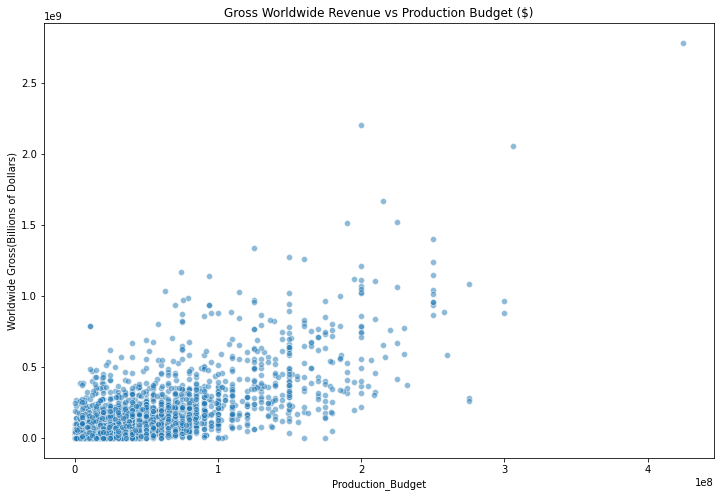

In [49]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=movies,x='Production_Budget',y='Worldwide_Gross',alpha=0.5)
ax.set_ylabel("Worldwide Gross(Billions of Dollars)")
ax.set_title("Gross Worldwide Revenue vs Production Budget ($)")

Text(0.5, 1.0, 'Gross Worldwide Revenue vs Production Budget ($)')

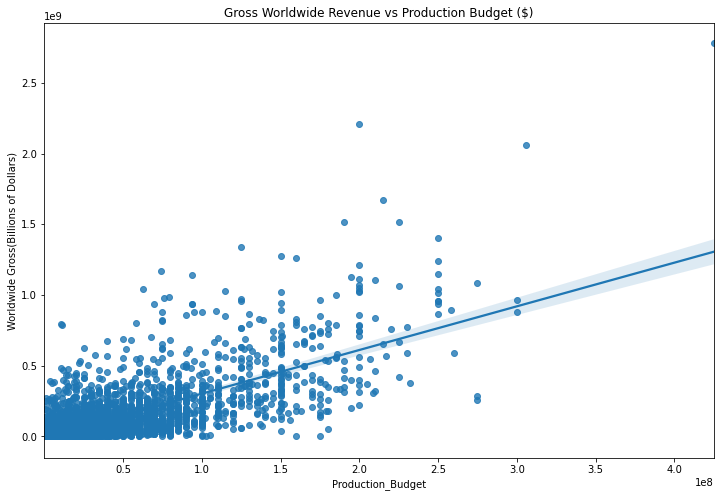

In [44]:
plt.figure(figsize=(12,8))
ax = sns.regplot(data=movies,x='Production_Budget',y='Worldwide_Gross')
ax.set_ylabel("Worldwide Gross(Billions of Dollars)")
ax.set_title("Gross Worldwide Revenue vs Production Budget ($)")

In [45]:
X = movies.Production_Budget.to_frame()
y = movies.Worldwide_Gross

In [46]:
X

,Production_Budget
0,"$110,000.00"
1,"$385,907.00"
2,"$200,000.00"
3,"$100,000.00"
4,"$245,000.00"
...,...
5386,"$15,000,000.00"
5387,"$160,000,000.00"
5388,"$175,000,000.00"
5389,"$50,000,000.00"


In [47]:
y

0      $11,000,000.00
1               $0.00
2       $8,000,000.00
3       $3,000,000.00
4      $22,000,000.00
            ...      
5386            $0.00
5387            $0.00
5388            $0.00
5389            $0.00
5390            $0.00
Name: Worldwide_Gross, Length: 5391, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [52]:
lr.coef_

array([3.08949319])

In [53]:
lr.intercept_

-7270258.419956028

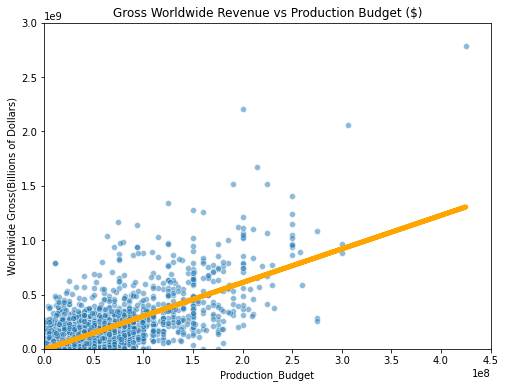

In [65]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=movies,x='Production_Budget',y='Worldwide_Gross',alpha=0.5)
ax.set_ylabel("Worldwide Gross(Billions of Dollars)")
ax.set_title("Gross Worldwide Revenue vs Production Budget ($)")
ax.set_xlim(0,4.5e8)
ax.set_ylim(0,3e9)
ax.plot(X,lr.predict(X),linewidth=5,color='orange')


In [66]:
lr.predict([[5e7]])

array([1.47204401e+08])

In [68]:
lr.score(X,y)

0.5523479123077013